<a href="https://colab.research.google.com/github/BraceroInSabot/Desafio-Analise_Expiatoria/blob/master/analise_expiatoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [4]:
from google.colab import files
arquivo = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [8]:
df = pd.read_excel("AdventureWorks.xlsx")
# print(df)

In [28]:
df.head() # Os 5 primeiros

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,tempo_entrega
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,5
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,6
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,6
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,7


In [27]:
df.dtypes # tipos das colunas

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
custo                    float64
lucro                    float64
tempo_entrega              int64
dtype: object

In [12]:
# Receita total
df["Valor Venda"].sum()

5984606.1426

In [26]:
# Custo total | achando a chave CUSTO
df["custo"] = df["Custo Unitário"].mul(df["Quantidade"])

# Checar o resultado
# df.head(1)

# Resultado
round(df["custo"].sum(), 2)

2486783.05

In [25]:
# Lucro total | achando a chave LUCRO
df["lucro"] = df["Valor Venda"] - df["custo"]

# Checar o resultado
# df.head(1)

# Resultado
round(df["lucro"].sum(), 2)

3497823.09

In [24]:
# Tempo de entrega dos produtos | achando a chave TEMPO_ENTREGA
df["tempo_entrega"] = (df["Data Envio"] - df["Data Venda"]).dt.days 
# (x).dt.days para extrair somente o número

# Checar o resultado
df.head(1)


,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,tempo_entrega
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20


In [23]:
# Vendo o tipo de dado que criamos:
df["tempo_entrega"].dtype

dtype('int64')

In [31]:
# Pega a coluna marcas e compara com a média do tempo de entrega
df.groupby("Marca")["tempo_entrega"].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: tempo_entrega, dtype: float64

# Missing Values


In [30]:
# Verificando se temos valores ausentes
df.isnull().sum(0)

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
custo             0
lucro             0
tempo_entrega     0
dtype: int64

# Lucro por Ano e Marca

In [34]:
# Configurando os números flutuantes
pd.options.display.float_format = "{:20,.2f}".format

In [36]:
# Agrupar por ano e marca e comparando os lucros
df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: lucro, dtype: float64

In [38]:
# Resetando o index e criando uma tabela visual
lucro_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum().reset_index()
lucro_ano

,Data Venda,Marca,lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


# Total de Produtos vendidos

In [41]:
# Retorna quantos produtos foram vendidos em ordem decrescente
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

Text(0, 0.5, 'Produto')

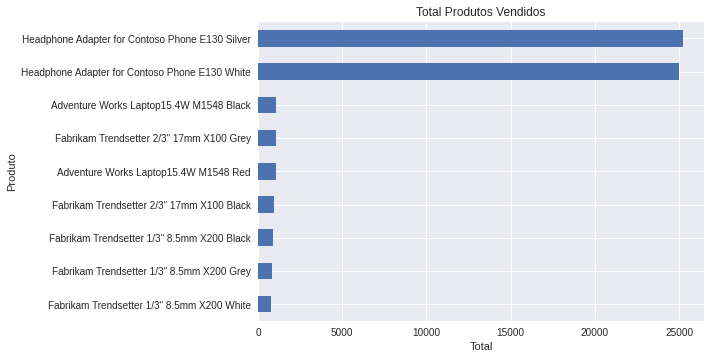

In [43]:
# Retorna quantos produtos foram vendidos em ordem decrescente agora em gráfico
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title="Total Produtos Vendidos")
plt.xlabel("Total")
plt.ylabel("Produto")

Text(0, 0.5, 'Receita')

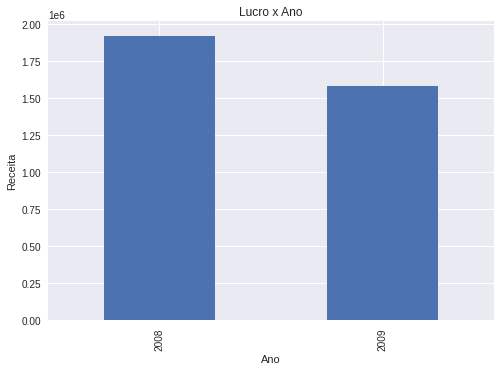

In [45]:
# Retorna o gráfico que representa o Lucro por Ano
df.groupby(df["Data Venda"].dt.year)["lucro"].sum().plot.bar(title="Lucro x Ano")
plt.xlabel("Ano")
plt.ylabel("Receita")

In [48]:
# Selecionando/filtrando as vendas apenas de 2009
df_2009 = df[df["Data Venda"].dt.year == 2009]

# Checando o resultado
df_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,tempo_entrega
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


Text(0, 0.5, 'Lucro')

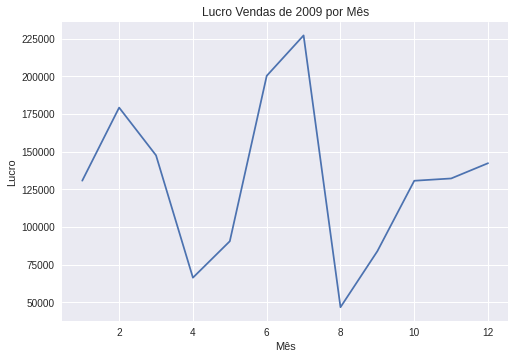

In [50]:
# Retorna o gráfico de lucro de vendas por MÊS do ano de 2009
df_2009.groupby(df_2009["Data Venda"].dt.month)["lucro"].sum().plot(title="Lucro Vendas de 2009 por Mês")
plt.xlabel("Mês")
plt.ylabel("Lucro")

(array([0, 1, 2]),
 [Text(0, 0, 'Adventure Works'),
  Text(1, 0, 'Contoso'),
  Text(2, 0, 'Fabrikam')])

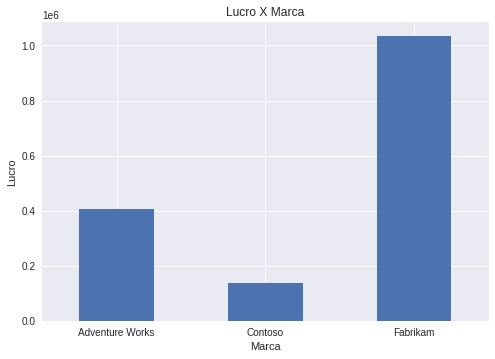

In [54]:
# Retorna um gráfico onde podemos analisar a Marca que dá mais lucro
df_2009.groupby("Marca")["lucro"].sum().plot.bar(title="Lucro X Marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation="horizontal")

(array([0, 1]), [Text(0, 0, 'Economy'), Text(1, 0, 'Regular')])

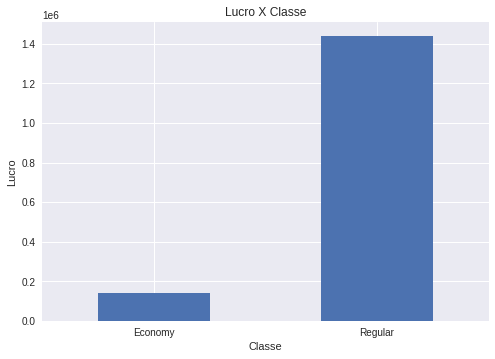

In [55]:
# Retorna um gráfico onde podemos analisar a Classe que dá mais lucro
df_2009.groupby("Classe")["lucro"].sum().plot.bar(title="Lucro X Classe")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation="horizontal")

In [60]:
# Nos dá um retorno interessante!
# 25% das entregas demoram 6 dias
# 50% ou a média, demoram 9 dias
# 75% demoram 11 dias
# a maior espera que possivelmente pode ter é de 20 dias
df["tempo_entrega"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: tempo_entrega, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdad0045970>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdad0045f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdad0045670>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdad00544f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdad00547f0>],
 'means': []}

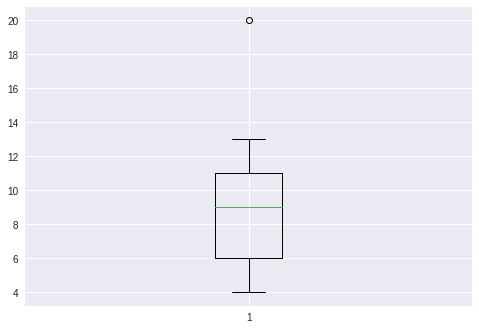

In [68]:
"""
 Gráfico de Boxplot

 a primeira base é o mínimo

 o pé da candle representa 25% das entregas

 o traço verde representa a média, ou 50%

 o topo da candle representa 75% das entregas

 a última base representa o maior valor de forma segura

 o ponto, na marcação 20, representa o outlier
"""
plt.boxplot(df["tempo_entrega"])

(array([217., 137.,  70., 179., 115., 185.,   0.,   0.,   0.,   1.]),
 array([ 4. ,  5.6,  7.2,  8.8, 10.4, 12. , 13.6, 15.2, 16.8, 18.4, 20. ]),
 <BarContainer object of 10 artists>)

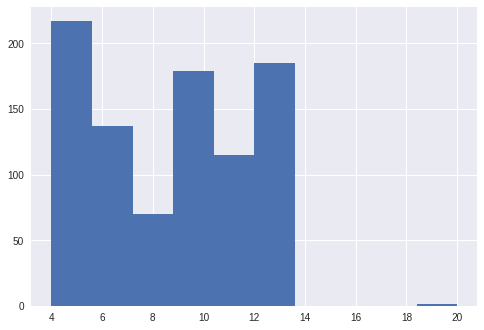

In [61]:
# Histograma
plt.hist(df["tempo_entrega"])

In [63]:
# Tempo mínimo de envio
df["tempo_entrega"].min()

4

In [66]:
# Tempo máximo de envio
df["tempo_entrega"].max()

20

In [67]:
# Identificando o outlier (ou também, margem de erro) 
df[df["tempo_entrega"] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,tempo_entrega
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


# Processando em um arquivo CSV

In [69]:
df.to_csv("DIO-df_vendas_novo.csv", index=False)